In this notebook we try to better understand the results of cross-validation for small MHNs (3x3 or 4x4).
Especially the transferability of lambda results from 3x3 MHNs onto 4x4 MHNs is of our interest

In [3]:
import __init__
import os
from definition import mhn_tools as mytools
import mhn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [4]:
file_names=["G16_CH_BLCA_Events.csv", "G16_CH_COAD_Events.csv", "G16_CH_LUAD_Events.csv", "G16_CH_MEL_Events.csv", "G16_CH_PRAD_Events.csv"]
file_path=os.path.join( os.getcwd(), '../..','data', file_names[2] )
input = pd.read_csv(file_path)
events=list(input.columns)[1:]

In [5]:
np.random.seed(1234)
pick_1se=False
repetitions=5
mhn_sizes=np.repeat([2,3,4,5],repetitions)
lambdas=[]
for size in mhn_sizes:
    ev_choice=np.random.choice(events,size, replace=False)
    print(f"Doing cv for size {size} with events {ev_choice}")
    optimizer = mhn.optimizers.cMHNOptimizer()
    reduced_data=input[ev_choice]
    #print(reduced_data)
    optimizer.load_data_matrix(reduced_data)
    lam=optimizer.lambda_from_cv(lambda_vector=mytools.getLambdaSearchRange(reduced_data), pick_1se=pick_1se)
    lambdas.append(lam)


Doing cv for size 2 with events ['EGFR (M)' 'RB1/13q (Del)']


KeyboardInterrupt: 

In [ ]:
extra_mhn_sizes=[6,6,6,7,7,8]
for size in extra_mhn_sizes:
    ev_choice=np.random.choice(events,size, replace=False)
    print(f"Doing cv for size {size} with events {ev_choice}")
    optimizer = mhn.optimizers.cMHNOptimizer()
    reduced_data=input[ev_choice]
    #print(reduced_data)
    optimizer.load_data_matrix(reduced_data)
    lam=optimizer.lambda_from_cv(lambda_vector=mytools.getLambdaSearchRange(reduced_data), pick_1se=pick_1se)
    lambdas.append(lam)

mhn_sizes = np.concatenate((mhn_sizes, extra_mhn_sizes))

Doing cv for size 6 with events ['PIK3CA (M)' 'EGFR (M)' 'APC (M)' 'BRAF (M)' 'BCL2/18q (Del)' 'FAT1 (M)']
Doing cv for size 6 with events ['RB1/13q (Del)' 'KMT2D (M)' 'BRAF (M)' 'SMAD4 (M)' 'MCL1/1q (Amp)'
 'EGFR/7p (Amp)']
Doing cv for size 6 with events ['EPHA7/6q (Del)' 'RB1 (M)' 'BRAF (M)' 'PIK3CA (M)' 'SETD2 (M)'
 'KMT2D (M)']
Doing cv for size 7 with events ['TERT/5p (Amp)' 'EGFR (M)' 'CH' 'KMT2D (M)' 'FAT1 (M)' 'ERBB2 (M)'
 'STK11 (M)']
Doing cv for size 7 with events ['KRAS (M)' 'KEAP1 (M)' 'MCL1/1q (Amp)' 'ATRX (M)' 'NF1 (M)' 'SETD2 (M)'
 'CDKN2A/9p (Del)']
Doing cv for size 8 with events ['MYC/8q (Amp)' 'CH' 'BRAF (M)' 'STK11 (M)' 'KRAS (M)' 'KEAP1 (M)'
 'PIK3CA (M)' 'SMARCA4 (M)']


[3.8684819535783336e-05, 0.00038684794538259117, 3.8684819535783336e-05, 0.00012233210108109026, 0.00038684794538259117, 0.00012233210108109026, 3.8684819535783336e-05, 0.00038684794538259117, 0.00012233210108109026, 0.00012233210108109026, 0.00038684794538259117, 0.00038684794538259117, 0.00038684794538259117, 3.8684819535783336e-05, 0.0012233202203200352, 0.00012233210108109026, 0.00038684794538259117, 0.00038684794538259117, 0.00038684794538259117, 3.8684819535783336e-05, 0.00038684794538259117, 0.00038684794538259117, 0.00012233210108109026, 0.00038684794538259117, 0.00038684794538259117, 0.00012233210108109026]


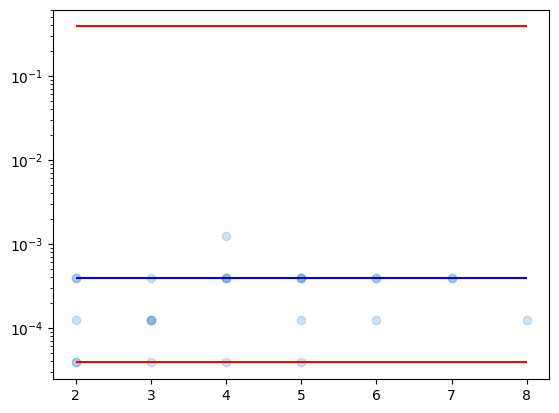

In [ ]:
print(lambdas)

searchrange=mytools.getLambdaSearchRange(input)
lam_mid=1.0/len(input)
lam_max=searchrange.max()
lam_min=searchrange.min()

plt.scatter(mhn_sizes, lambdas,alpha=0.2)
plt.hlines([lam_mid,lam_max,lam_min],min(mhn_sizes), max(mhn_sizes), colors=['b','r','r'])
plt.yscale('log')
